In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt


In [6]:
train_values = pd.read_csv('train_values.csv')
train_labels = pd.read_csv('train_labels.csv')
full_train = train_values.merge(train_labels, on = 'building_id')

In [15]:
full_train = full_train.applymap(lambda col: np.nan if col == 995 else col)

In [5]:
# custom helper function to get counts and percents by group
def count_pct(dataframe, column):
    # calculate grouped counts
    grp_count = (
        dataframe.groupby(column)
        .size()
        .reset_index(name = 'count')
        .sort_values(['count'], ascending = False)
        )
    # use counts to generate percents
    grp_pct = grp_count.assign(
        pct = lambda dataframe: dataframe['count'].map(lambda count: count / np.nansum(grp_count['count'])) 
        )
    return grp_pct

# custom helper function to print five number summary for a column
def five_number_summary(column):
    # calculate quartiles
    quartiles = np.percentile(column, [25, 50, 75])
    # calculate min/max
    data_min, data_max = column.min(), column.max()
    # print 5-number summary
    print('Min: %.3f' % data_min)
    print('Q1: %.3f' % quartiles[0])
    print('Median: %.3f' % quartiles[1])
    print('Q3: %.3f' % quartiles[2])
    print('Max: %.3f' % data_max)
    
def missing_value_plot(data):
    plt.style.use('seaborn')
    plt.figure(figsize = (15,10))
    sns.heatmap(data.isnull(), yticklabels = False, cmap = 'plasma')
    plt.title('Missing Values in Data Set');
    plt.show()



In [16]:
full_train.describe()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
count,2.606010e+05,260601.000000,260599.000000,260569.000000,260601.000000,259211.000000,260601.000000,260601.000000,260601.000000,260601.000000,...,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,5.256755e+05,13.900353,701.072429,6258.522472,2.129723,21.341706,8.018051,5.434365,0.088645,0.761935,...,0.033626,0.008101,0.000940,0.000361,0.001071,0.000188,0.000146,0.000088,0.005119,2.238272
std,3.045450e+05,8.033617,412.711514,3646.127054,0.727665,19.606818,4.392231,1.918418,0.284231,0.425900,...,0.180265,0.089638,0.030647,0.018989,0.032703,0.013711,0.012075,0.009394,0.071364,0.611814
min,4.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.611900e+05,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,5.257570e+05,12.000000,702.000000,6270.000000,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,7.897620e+05,21.000000,1050.000000,9413.000000,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,1.052934e+06,30.000000,1427.000000,12567.000000,9.000000,200.000000,100.000000,32.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


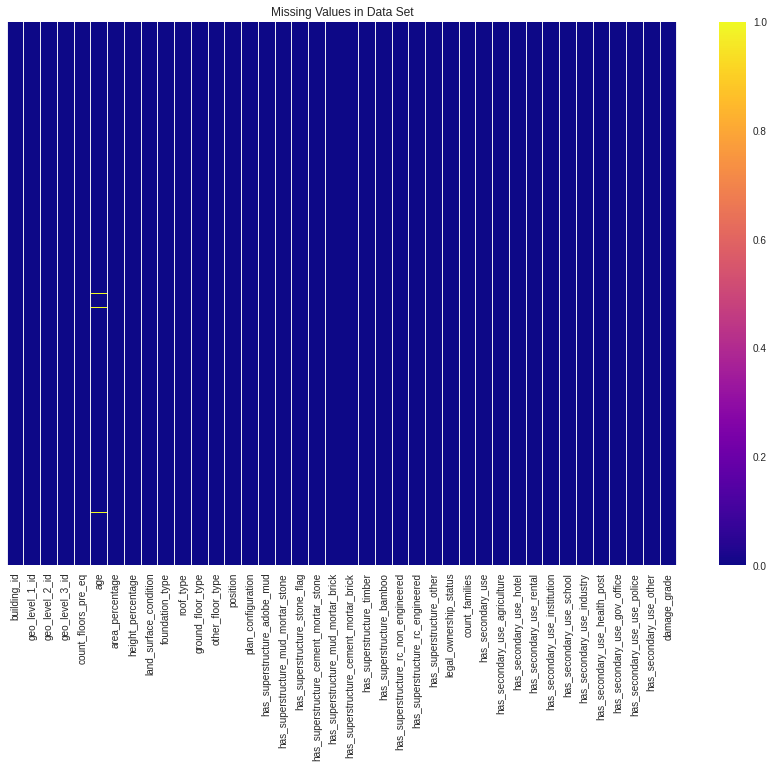

In [17]:
missing_value_plot(full_train)

<AxesSubplot:xlabel='damage_grade', ylabel='age'>

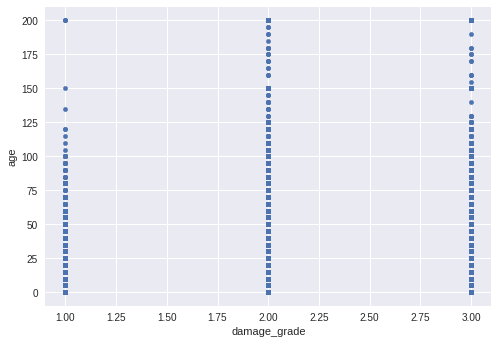

In [21]:
full_train.plot.scatter('damage_grade', "age")

In [19]:
full_train.value_counts("age", sort = True)

age
10.0     38896
15.0     36010
5.0      33697
20.0     32182
0.0      26041
25.0     24366
30.0     18028
35.0     10710
40.0     10559
50.0      7257
45.0      4711
60.0      3612
80.0      3055
55.0      2033
70.0      1975
100.0     1364
65.0      1123
90.0      1085
85.0       847
75.0       512
95.0       414
120.0      180
150.0      142
200.0      106
110.0      100
105.0       89
125.0       37
115.0       21
130.0        9
140.0        9
180.0        7
170.0        6
160.0        6
175.0        5
135.0        5
145.0        3
190.0        3
165.0        2
195.0        2
185.0        1
155.0        1
dtype: int64

In [25]:
full_train.corrwith(full_train['damage_grade'])

building_id                               0.001063
geo_level_1_id                           -0.072347
geo_level_2_id                            0.043163
geo_level_3_id                            0.007837
count_floors_pre_eq                       0.122308
age                                       0.148396
area_percentage                          -0.125221
height_percentage                         0.048130
has_superstructure_adobe_mud              0.055314
has_superstructure_mud_mortar_stone       0.291325
has_superstructure_stone_flag             0.066039
has_superstructure_cement_mortar_stone   -0.060295
has_superstructure_mud_mortar_brick       0.014561
has_superstructure_cement_mortar_brick   -0.254131
has_superstructure_timber                -0.069852
has_superstructure_bamboo                -0.063051
has_superstructure_rc_non_engineered     -0.158145
has_superstructure_rc_engineered         -0.179014
has_superstructure_other                 -0.030224
count_families                 

In [80]:
drop_vars = ['building_id', 'damage_grade',
             'has_superstructure_bamboo',                
'has_superstructure_mud_mortar_brick',       
'has_superstructure_adobe_mud',              
'legal_ownership_status',                    
'has_secondary_use',                         
'has_superstructure_stone_flag',             
'has_superstructure_rc_non_engineered',      
'has_superstructure_rc_engineered',          
'has_secondary_use_agriculture',             
'has_superstructure_cement_mortar_stone',    
'has_secondary_use_hotel',                   
'has_superstructure_other',                
'has_secondary_use_rental',                  
'has_secondary_use_other',                   
'has_secondary_use_industry',               
'has_secondary_use_institution',             
'has_secondary_use_school',                  
'has_secondary_use_health_post',            
'has_secondary_use_gov_office',          
'has_secondary_use_use_police' ]

In [81]:
import category_encoders as ce
targ_enc = ce.TargetEncoder()
targ_enc.fit(full_train.drop(drop_vars, axis = 1), train_labels['damage_grade'])
rf_test = targ_enc.transform(full_train.drop(drop_vars, axis = 1))

/home/matt/anaconda3/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [82]:
imp = IterativeImputer(max_iter=10, max_value = 2013)
imp.fit(rf_test)

rf_test = pd.DataFrame(imp.transform(rf_test), columns = rf_test.columns)


In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, make_scorer

In [83]:
rf_vals = train_labels['damage_grade']
rf = RandomForestClassifier(max_depth = 20, random_state = 23456)

In [84]:
cvs = cross_val_score(rf, rf_test, rf_vals, scoring = make_scorer(f1_score, average='micro'), cv = 5)
print(cvs)

[0.71646745 0.70949731 0.71751727 0.71767076 0.71542594]


In [85]:
rf.fit(rf_test, rf_vals)

RandomForestClassifier(max_depth=20, random_state=23456)

In [86]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                    index = rf_test.columns,
                                     columns=['importance']).sort_values('importance',   
                                                                         ascending=False)
                                                                        
print(feature_importances)

                                     importance
geo_level_1_id                         0.239228
geo_level_2_id                         0.140090
geo_level_3_id                         0.130122
area_percentage                        0.091041
age                                    0.083829
foundation_type                        0.054752
height_percentage                      0.053705
ground_floor_type                      0.043231
other_floor_type                       0.030503
roof_type                              0.029687
has_superstructure_mud_mortar_stone    0.028310
count_floors_pre_eq                    0.025939
position                               0.024941
count_families                         0.024622


In [87]:
test = pd.read_csv('test_values.csv')

In [88]:
test['damage_grade'] = 1
m_test = targ_enc.transform(test.drop(drop_vars, axis = 1))
m_test = pd.DataFrame(imp.transform(m_test), columns = m_test.columns)

In [89]:
test["damage_grade"] = rf.predict(m_test)

In [90]:
test[['building_id', 'damage_grade']].to_csv("rf_dropped_low_importance.csv", index = False)